<a href="https://colab.research.google.com/github/VishwanthReddy99/task/blob/master/catsdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('catsdogs')
jovian.set_colab_id('1uwV_E23NrPmdyirfwQZxikPTZHW2Sq5s')

In [5]:
!pip install jovian --upgrade --quiet

In [6]:
!pip install opendatasets


In [7]:
import opendatasets as od

In [8]:
url="https://www.kaggle.com/chetankv/dogs-cats-images"

In [9]:
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: v170399
Your Kaggle Key: ··········


  2%|▏         | 9.00M/435M [00:00<00:04, 92.2MB/s]

100%|██████████| 435M/435M [00:02<00:00, 201MB/s]


In [10]:
#Importing the dataset
import os
import torchvision
from torchvision.datasets import ImageFolder
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [11]:
data_dir="/content/dogs-cats-images/dataset/training_set"
test_data="/content/dogs-cats-images/dataset/test_set"

In [12]:
os.listdir(test_data)

['dogs', 'cats']

In [13]:
dataset=ImageFolder(data_dir)


In [14]:
len(dataset)

8000

In [15]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=300x280 at 0x7FCBFD846D68>, 0)

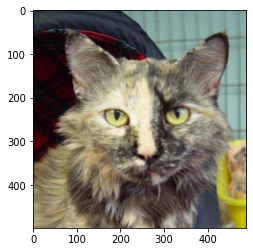

In [16]:
#Showing image
import matplotlib.pyplot as plt
img,label=dataset[1]
plt.imshow(img)

In [17]:
#Finding Mean and Standard Deviation.
datasetformean=ImageFolder(data_dir,tt.Compose([tt.ToTensor(),tt.Resize(32),tt.RandomCrop(32)]))
loader=DataLoader(datasetformean,batch_size=64,shuffle=True)
def get_m_std(loader):
  c_sum,c_sum_sqaures,num_batches=0,0,0
  for data,_ in loader:
    c_sum=c_sum+torch.mean(data,dim=[0,2,3])
    c_sum_sqaures=c_sum_sqaures+torch.mean(data,dim=[0,2,3])
    num_batches=num_batches+1
  mean=c_sum/num_batches
  std=(c_sum_sqaures/num_batches-mean**2)**0.05
  return mean,std 
mean,std=get_m_std(loader)
print(mean)
print(std)




tensor([0.4902, 0.4552, 0.4170])
tensor([0.9330, 0.9327, 0.9317])


Note: Always check if all the images have same size.Crop pics using tt.resize,tt.Randomcrop


In [18]:
import torchvision.transforms as tt
dataset=ImageFolder(data_dir,tt.Compose([tt.Resize(32),tt.RandomCrop(32),
    tt.RandomHorizontalFlip(),
    
    tt.ToTensor(),

    ]

))
test_dataset=ImageFolder(test_data,tt.Compose([tt.Resize(32),tt.RandomCrop(32),tt.ToTensor()]))


Note: To visulaize a tensor alwyas use permute as the channels are first array ,but plt needs to last array 


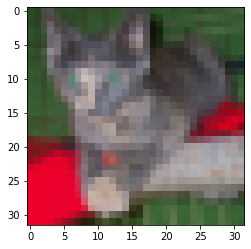

In [19]:


img,label=dataset[250]
plt.imshow(img.permute((1,2,0)))

 Note:Create a Validation Set Size.

In [20]:

val_pct=0.2
val_size=int(val_pct*len(dataset))
train_size=len(dataset)-val_size
train_size,val_size

(6400, 1600)

Note:Create training and Validation Sets

In [21]:

from torch.utils.data import random_split

train_ds,valid_ds=random_split(dataset,[train_size,val_size])

Note:Create DataLoaders


In [22]:
from torch.utils.data import DataLoader

batch_size=15

# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size, num_workers=3, pin_memory=True)


tensor([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0])


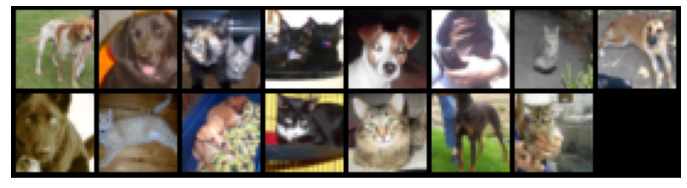

In [23]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        print(labels)
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

show_batch(train_dl)

In [24]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [25]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [26]:
device = get_default_device()
device

device(type='cuda')

In [27]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)
print(len(train_dl))
print(len(valid_dl))

427
107


In [28]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions

        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [29]:
torch.cuda.empty_cache()


In [30]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        self.conv5=conv_block(512,1024)
        self.res3 = nn.Sequential(conv_block(1024, 1024), conv_block(1024, 1024))
        self.conv6=conv_block(1024,2048)
        self.res4 = nn.Sequential(conv_block(2048, 2048), conv_block(2048, 2048))


        


        self.flat=nn.Flatten()
        self.drop=nn.Dropout(0.2)
        self.classifier = nn.Sequential(nn.MaxPool2d(2), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)

        out = self.res1(out) + out

        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out=self.conv5(out)
        out=self.res3(out)+out
        out=self.conv6(out)
        out=self.res4(out)+out

        


        out=self.flat(out)
        out=self.drop(out)
        return out

In [31]:
model = to_device(ResNet9(3, 2), device)
model


ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [32]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [33]:
history = [evaluate(model, valid_dl)]
history


[{'val_acc': 0.0, 'val_loss': 10.40091323852539}]

In [34]:
epochs = 20
max_lr = 0.01
grad_clip = 0.3
weight_decay = 1e-4
opt_func = torch.optim.Adam
history=[]

In [35]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00104, train_loss: 4.7759, val_loss: 3.4871, val_acc: 0.6302
Epoch [1], last_lr: 0.00280, train_loss: 2.9512, val_loss: 1.4789, val_acc: 0.6692
Epoch [2], last_lr: 0.00520, train_loss: 2.8573, val_loss: 1.5438, val_acc: 0.6869
Epoch [3], last_lr: 0.00760, train_loss: 2.7858, val_loss: 1.4647, val_acc: 0.6467
Epoch [4], last_lr: 0.00936, train_loss: 2.7340, val_loss: 1.7211, val_acc: 0.6421
Epoch [5], last_lr: 0.01000, train_loss: 2.7677, val_loss: 1.6669, val_acc: 0.6514
Epoch [6], last_lr: 0.00987, train_loss: 2.6124, val_loss: 1.4010, val_acc: 0.7396
Epoch [7], last_lr: 0.00950, train_loss: 2.6888, val_loss: 1.5406, val_acc: 0.6813
Epoch [8], last_lr: 0.00891, train_loss: 2.6392, val_loss: 1.4883, val_acc: 0.6994
Epoch [9], last_lr: 0.00812, train_loss: 2.6652, val_loss: 1.3647, val_acc: 0.7414
Epoch [10], last_lr: 0.00717, train_loss: 2.5849, val_loss: 1.1703, val_acc: 0.7567
Epoch [11], last_lr: 0.00611, train_loss: 2.6407, val_loss: 1.3163, val_acc: 0.7642
Ep

In [36]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

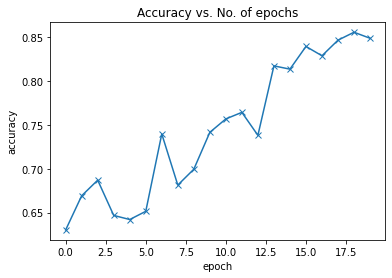

In [37]:
plot_accuracies(history)

In [40]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Metrics logged.


In [38]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=15), device)
test_loader


In [39]:
result = evaluate(model,test_loader)
result


{'val_acc': 0.8562189340591431, 'val_loss': 0.9251411557197571}

In [46]:
torch.save(model.state_dict(), 'CatsvsDogs-resnet9.pth')

In [47]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [48]:
jovian.reset()
jovian.log_hyperparams(arch='CatsvsDogs', 
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [50]:
jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   )

[jovian] Metrics logged.


In [59]:
jovian.commit(project='catsdogs')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/vishwanthreddy99/catsdogs


'https://jovian.ai/vishwanthreddy99/catsdogs'